In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(city_data, ride_data)

# Display the data table for preview
df = df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

In [12]:
# Obtain the x and y coordinates for each of the three city types

#   use groupby, mean, & count to find needed values
grouped_df = df.groupby(["type", "city"])
avg_fare = grouped_df.mean()
avg_fare["fare"]
total_rides = grouped_df.count()
total_rides["ride_id"]
driver_count = df[["city", "driver_count", "type"]].drop_duplicates().set_index(["type","city"])

#   merge data frames with needed values together to have one data frame
scatter_data = pd.merge(avg_fare, total_rides, on=["type", "city"])
scatter_data = scatter_data[["fare_x", "ride_id_y"]]
scatter_data = scatter_data.rename(columns = {"fare_x": "Average Fare", "ride_id_y": "Total Rides"})
scatter_data = pd.merge(scatter_data, driver_count, on=["type", "city"])

#   separate the data by city type
rural = scatter_data.loc["Rural",:]
urban = scatter_data.loc["Urban", :]
suburban = scatter_data.loc["Suburban", :]

# Build the scatter plots for each city types
plt.scatter(rural["Total Rides"], rural["Average Fare"], marker="o", facecolor="gold", edgecolor="black", s=(8*rural))
plt.scatter(urban["Total Rides"], urban["Average Fare"], marker="o", facecolor="lightcoral", edgecolor="black", s=(8*urban))
plt.scatter(suburban["Total Rides"], suburban["Average Fare"], marker="o", facecolor="skyblue", edgecolor="black", s=(8*suburban))

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend(["Rural", "Urban", "Suburban"])
# Incorporate a text label regarding circle size
plt.annotate("Note: Circle sizes correlate to driver count per city", xy=(0,5))
# Save Figure
plt.savefig("../Pyber_saved_figure/pyber.png")

SyntaxError: invalid syntax (<ipython-input-12-f362bc53c689>, line 34)

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

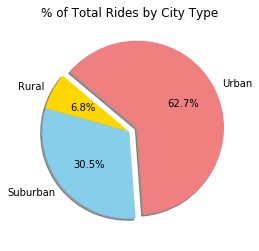

In [114]:
# Calculate Type Percents
total_fare = df.groupby("type").sum()

city_types = ["Rural", "Suburban", "Urban"]
fare_percent = []

for city_types in city_types:
    fare_percent.append((total_fare.loc[city_types,"fare"] / total_fare["fare"].sum()) * 100)


explode = (0, 0, 0.1)
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "Skyblue", "lightcoral"]

# Build Pie Chart
plt.pie(fare_percent, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Pyber_saved_figure/pyber_fares.png")

In [24]:
# Show Figure
plt.show()

## Total Rides by City Type

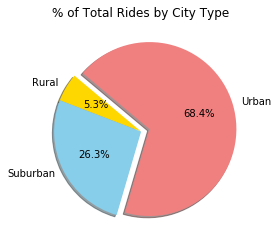

In [110]:
# Calculate Ride Percents
total_rides = df.groupby("type").count()

city_types = ["Rural", "Suburban", "Urban"]
rides_percent = []

for city_types in city_types:
    rides_percent.append((total_rides.loc[city_types, "city"] / total_rides["city"].sum()) * 100)

# Build Pie Chart
plt.pie(rides_percent, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Pyber_saved_figure/pyber_rides")

In [38]:
# Show Figure
plt.show()

## Total Drivers by City Type

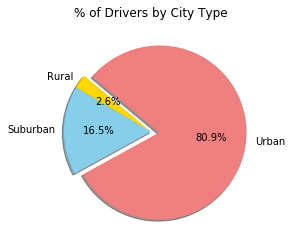

In [112]:
# Calculate Driver Percents
driver_data = driver_count.reset_index("city")

city_types = ["Rural", "Suburban", "Urban"]
driver_percents = []

for city_types in city_types:
    driver_percents.append((driver_data.loc[city_types, "driver_count"].sum() / driver_data.loc[:, "driver_count"].sum()) * 100)


# Build Pie Charts
plt.pie(driver_percents, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Drivers by City Type")
# Save Figure
plt.savefig("../Pyber_saved_figure/pyber_drivers")

In [100]:
# Show Figure
plt.show()